<a href="https://colab.research.google.com/github/aviralsingh2907/PlayStore-App-Review-Analysis/blob/main/EDA_Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u>Exploratory Data Analysis</u> - <u>Play Store App Review Analysis</u></b>

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member**     - Aviral Singh

# <b><u>Project Summary</u>:</b>

# **<u>GitHub Link</u>:**

# <b><u>Problem Statement</u>:</b>

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.

Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.

Explore and analyze the data to discover key factors responsible for app engagement and success.

# <b><u>Dataset Import</u>:</b>

In [3]:
# Importing package:

import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the datasets:

playstore_df_main = pd.read_csv('/content/drive/MyDrive/Portfolio Project/EDA - Play Store App Review/Play Store Data.csv')
user_review_df_main = pd.read_csv('/content/drive/MyDrive/Portfolio Project/EDA - Play Store App Review/User Reviews.csv')

In [5]:
# Creating copies:

playstore_df = playstore_df_main.copy()
user_review_df = user_review_df_main.copy()

In [6]:
playstore_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
user_review_df.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [8]:
# Checking dataset information:

playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [10]:
# Null values check:

playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
user_review_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

# <b><u>Data Cleaning (Play Store Dataset)</u>:</b>

Cleaning raw data before processing & analysis:

* Determining which parts of the data are incomplete, incorrect, inaccurate or irrelevant.
* Replacing, changing, or deleting the soiled or coarse data.

Creating a function to obtain necessary information about various dataset attributes.

The function can be recalled & reused in the future.

In [12]:
# Defining the function:

def necessary_info():
    null = pd.DataFrame(index = playstore_df.columns)
    null['data_type'] = playstore_df.dtypes
    null['null_count'] = playstore_df.isnull().sum()
    null['unique_count'] = playstore_df.nunique()
    return null

In [13]:
# Calling the function:

necessary_info()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


### <b><u>'App' column</u>:</b>

Checking for duplicate values in the 'App' column.

In [14]:
print("No. of Unique App names = ", len(playstore_df['App'].unique()))
print("Total no. of App names = ", playstore_df.shape[0])
print("Duplicate App names = ", len(playstore_df['App']) - len(playstore_df['App'].unique()))

No. of Unique App names =  9660
Total no. of App names =  10841
Duplicate App names =  1181


In [15]:
# Looking for occurence of duplicate values:

playstore_df[playstore_df['App'] == 'Coloring book moana']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2033,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [16]:
playstore_df.drop_duplicates(subset='App', keep='first', inplace=True)

### <b><u>'Type' column</u>:</b>

In [17]:
# Unique set of values in 'Type' column:

playstore_df.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

0 & null values found.

Replacing them by 'Free'.

In [18]:
playstore_df['Type'].replace(to_replace=['0'], value=['Free'], inplace=True)
playstore_df['Type'].fillna('Free', inplace=True)

### <b><u>'Content Rating' column</u>:</b>

In [19]:
# Checking for null values:

playstore_df[playstore_df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,Free,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [20]:
# Data comparison with adjacent rows:

playstore_df.loc[10465:10477, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10465,Portable Wi-Fi hotspot Free,COMMUNICATION,4.0,1711,2.1M,"100,000+",Free,0,Everyone,Communication,"January 11, 2018",1.2.5.4-11,2.3 and up
10466,Wi-Fi Networks,PRODUCTIVITY,4.2,115,1.4M,"10,000+",Free,0,Everyone,Productivity,"October 5, 2015",1.4,4.1 and up
10467,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0,Everyone,Finance,"July 5, 2018",1.1.1,5.0 and up
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,Free,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


<u>Observations</u>:

* Wrong data entry in row 10472.
* All of the column values found to be replaced by their previous columns' values due to a missing value in the category column.

In [21]:
# Dropping the rows containing null values in 'Content Rating' column:

playstore_df.dropna(subset=['Content Rating'], inplace=True)

### <b><u>'Rating' column</u>:</b>

* 'Rating' column has a total of 1463 missing values.
* Replacing the missing values with the Mode value of the column.

In [23]:
# Finding the mode value:

mode_rating = playstore_df['Rating'].mode()
print(f'The mode value of Rating column is: {mode_rating[0]}')

# Replacing the null values:

playstore_df['Rating'].fillna(value=mode_rating[0], inplace = True)
necessary_info()

The mode value of Rating column is: 4.3


,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,5330
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,118


### <b><u>Deleting Unnecessary Columns</u>:</b>

In [24]:
# Deleting unnecessary columns:

playstore_df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

In [25]:
necessary_info()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,5330
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,118


* The null counts for all necessary columns are zero.
* There are no more missing values in the data frame.

# <b><u>Data Preparation (Play Store Dataset)</u>:</b>

* Verifying the data type for 'Reviews', 'Size', 'Installs' & 'Price' columns.
* They should ideally be 'int' or 'float'.
* Making appropriate changes if not the case.

### <b><u>'Reviews' column</u>:</b>

In [26]:
# Converting 'Reviews' data type to 'int':

playstore_df['Reviews'] = playstore_df.Reviews.astype(int)

### <b><u>'Size' column</u>:</b>

* String values like 'Varies with device', 'M' & 'k' present in 'Size' column.
* Converting KBs to MBs. Removing non-numeric values. Converting to 'int' or 'float'.

In [27]:
# Removing '+' :

playstore_df['Size'] = playstore_df.Size.apply(lambda x: x.strip('+'))

In [28]:
# Removing ',' :

playstore_df['Size'] = playstore_df.Size.apply(lambda x: x.replace(',', ''))

In [29]:
# Removing 'M' & 'k', and converting KBs into MBs:

playstore_df['Size'] = playstore_df['Size'].apply(lambda x: x.replace('M', '') if 'M' in str(x) else x )
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: float(x.replace('k', ''))/1024 if 'k' in str(x) else x)

In [30]:
# Replacing 'Varies with device' by Nan:

playstore_df['Size'] = playstore_df.Size.replace('Varies with device', np.NaN)

* Null values need to be taken care of.
* Some apps' sizes will be too huge and others excessively small, i.e., too much variation in the apps' sizes.
* It's best to remove the rows containing Null value instead of replacing them with mean or mode.

In [31]:
# Removing rows containing Null (earlier 'Varies with device') value in 'Size' column:

playstore_df.dropna(subset=['Size'], inplace=True)

In [32]:
# Renaming the column:

playstore_df.rename(columns={'Size': 'Size(in MB)'}, inplace=True)

In [33]:
# Converting 'Size' datatype to numeric:

playstore_df['Size(in MB)'] = pd.to_numeric(playstore_df['Size(in MB)'])

### <b><u>'Installs' column</u>:</b>

In [34]:
# Checking for unique values:

playstore_df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '1,000,000,000+', '0+'], dtype=object)

* " , " needs to be replaced.
* " + " needs to be removed.
* Datatype needs to be changed to 'float'.

In [35]:
# Removing  '+' :

playstore_df['Installs'] = playstore_df.Installs.apply(lambda x: x.strip('+'))

# Replacing ',' :

playstore_df['Installs'] = playstore_df.Installs.apply(lambda x: x.replace(',', ''))

In [36]:
# Converting datatype to numeric:

playstore_df['Installs'] = pd.to_numeric(playstore_df['Installs'])

### <b><u>'Price' column</u>:</b>

In [37]:
# Checking for value count:

playstore_df['Price'].value_counts()

0          7747
$0.99       142
$2.99       110
$1.99        66
$4.99        63
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 87, dtype: int64

In [38]:
# Removing "$" :

playstore_df['Price'] = playstore_df.Price.apply(lambda x: x.strip('$'))

In [39]:
# Converting datatype to numeric:

playstore_df['Price'] = pd.to_numeric(playstore_df['Price'])

## <b><u>Final look at the DataFrame</u>:</b>

In [40]:
# Calling the function:

necessary_info()

,data_type,null_count,unique_count
App,object,0,8432
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4304
Size(in MB),float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,115


In [41]:
playstore_df.shape

(8432, 10)

* Dataset cleaned. Unnecessary rows & columns containing Null values & garbage data removed.
* 10 columns & 8434 rows in the final data frame.

## <b><u>Dataset summary based on</u>:</b>

* Total size occupied by each app category.
* Average rating for each app category.
* Total installs for each app category.
* Total reviews for each app category.

In [42]:
categorical_summary = playstore_df.groupby('Category').agg({'Size(in MB)':'sum', 'Rating':'mean', 'Installs':'sum','Reviews':'sum'})
categorical_summary

,Size(in MB),Rating,Installs,Reviews
Category,,,,
ART_AND_DESIGN,767.000000,4.358065,99338100,1087343
AUTO_AND_VEHICLES,1502.760547,4.172000,43770211,992322
BEAUTY,648.400000,4.293617,13696950,186856
BOOKS_AND_REFERENCE,2548.007031,4.316495,114962076,3262900
BUSINESS,5213.950977,4.179787,386428560,4391145
COMICS,675.928320,4.173469,17481150,614606
COMMUNICATION,2736.126172,4.126446,1817943051,45902247
DATING,2490.117578,4.042138,84606107,2197285
EDUCATION,1696.056641,4.373034,157302000,4173948


# <b><u>Data Analysis & Visualization (Play Store Dataset)</u>:</b>

### <b><u>'Category' wise Analysis</u>:</b>

In [45]:
# Unique categories:

len(playstore_df['Category'].unique())

33

* 33 unique app categories in this dataset.
* Figuring out category wise app counts.

In [46]:
# Determining top categories with highest app counts:

x = playstore_df['Category'].value_counts().index
y = playstore_df['Category'].value_counts()
xaxis = []
yaxis = []
for i in range(len(y)):
    xaxis.append(x[i])
    yaxis.append(y[i])

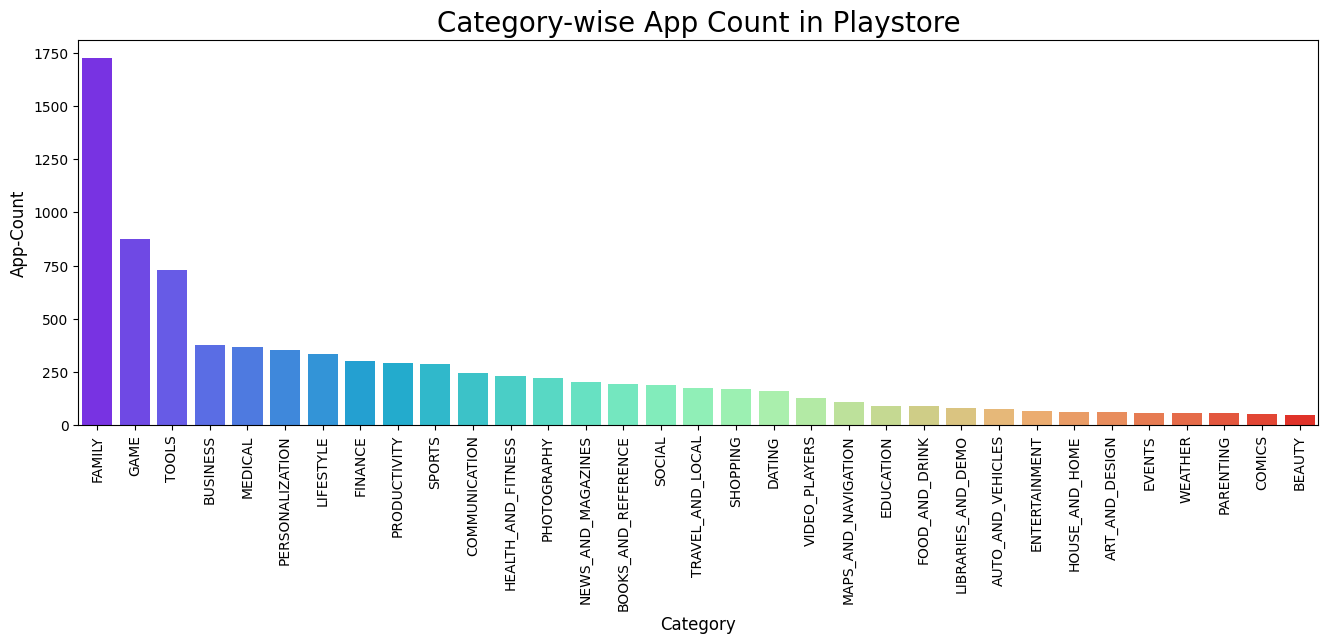

In [50]:
# Plotting graph for the same:

plt.figure(figsize=(16,5))
plt.xlabel("Category", fontsize = 12)
plt.ylabel("App-Count", fontsize = 12)
plt.xticks(rotation=90)
category_graph = sns.barplot(x = xaxis, y = yaxis, palette= "rainbow")
category_graph.set_title("Category-wise App Count in Playstore", fontsize = 20);

<b><u>Observations</u>:</b>
* 33 app categories in the dataset.
* 'Family' category has the most amount of apps, followed by 'Game' category.
* 'Beauty' category has the least amount of apps, followed by 'Comics' category.

In [51]:
# App-Count wise Top 10 categories:

Top10_categories = playstore_df['Category'].value_counts().reset_index().head(10)
Top10_categories.rename(columns={'index':'Category','Category':'Count'}, inplace=True)
Top10_categories

,Category,Count
0,FAMILY,1726
1,GAME,873
2,TOOLS,731
3,BUSINESS,376
4,MEDICAL,368
5,PERSONALIZATION,351
6,LIFESTYLE,334
7,FINANCE,299
8,PRODUCTIVITY,291
9,SPORTS,285


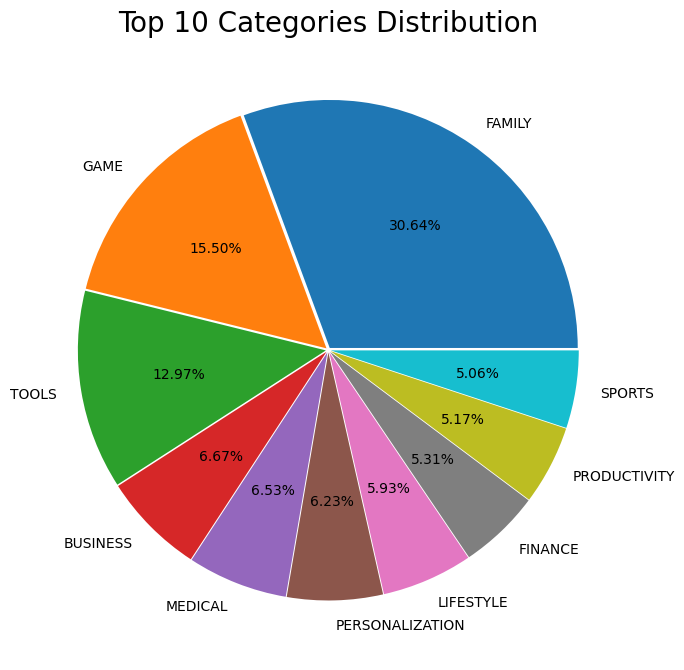

In [56]:
# Plotting Distribution:

plt.figure(figsize=(8,9))
plt.pie(Top10_categories['Count'], labels=Top10_categories['Category'], autopct='%.2f%%', explode=[0.01]*10)
plt.title('Top 10 Categories Distribution', fontsize=20)
plt.show()

<b><u>Observations</u>:</b>
* Family (31%), Games (15%) And Tools (13%) categories contribute the most to the Top 10 Categories by App-Count.

### <b><u>'Rating' wise Analysis</u>:</b>

<Figure size 1400x1000 with 0 Axes>

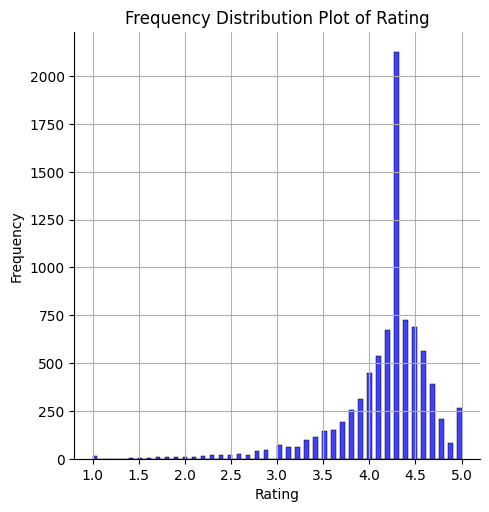

In [61]:
# Ploting Frequency Distribution graph for 'Rating':

plt.figure(figsize=(14,10))
sns.displot(playstore_df['Rating'], color ='blue')
plt.grid()
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title('Frequency Distribution Plot of Rating')
plt.show()

In [62]:
# Calculating the Average Rating:

print('The overall average rating in the playstore is :', playstore_df['Rating'].mean())

The overall average rating in the playstore is : 4.18384724857685


<b><u>Observations</u>:</b>
* Most apps in playstore have been rated 4 or more.
* It can be infered that most apps have managed to satisfy the users.

In [73]:
# App-Count of 5-Star Rated Apps:

five_star_rated_apps = playstore_df[playstore_df['Rating']==5]
five_star_rated_apps['App'].nunique()
print(f"The total no. of 5-star rated Apps is: {five_star_rated_apps['App'].nunique()}")

The total no. of 5-star rated Apps is: 266


In [75]:
# Top 10 Categories with most 5-Star Rated Apps:

top10_5StarApp_categories = five_star_rated_apps['Category'].value_counts().reset_index().rename(columns={'index':'Category','Category':'Count'}).head(10)
top10_5StarApp_categories

,Category,Count
0,FAMILY,65
1,LIFESTYLE,29
2,MEDICAL,25
3,BUSINESS,18
4,TOOLS,17
5,GAME,12
6,HEALTH_AND_FITNESS,12
7,PERSONALIZATION,10
8,SOCIAL,8
9,PRODUCTIVITY,8


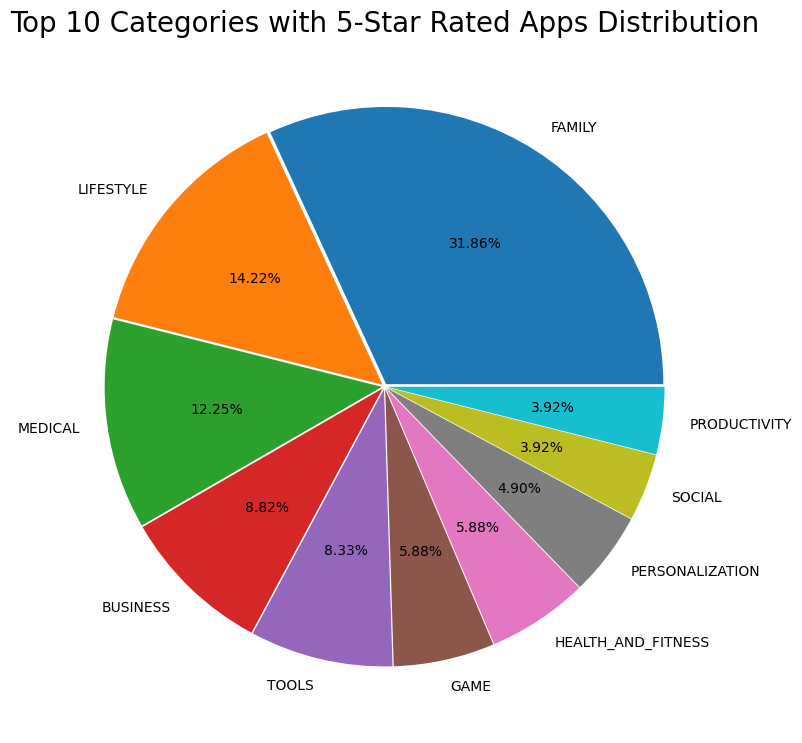

In [78]:
# Plotting Distribution:

plt.figure(figsize=(9,9))
plt.pie(top10_5StarApp_categories['Count'], labels=top10_5StarApp_categories['Category'], autopct='%.2f%%', explode=[0.01]*10)
plt.title('Top 10 Categories with 5-Star Rated Apps Distribution', fontsize=20)
plt.show()

<b><u>Observations</u>:</b>
* Family category has the most 5-star rated apps, followed by Lifestyle & Medical.
* The top 3 categories make the most of the Top 10 Categories with most 5-star rated apps.

### <b><u>'Content Rating' wise Analysis</u>:</b>

Let us see, which category of Apps from the ‘Content Rating’ column is found more on the play store.

In [81]:
# Content rating value counts:

value_c = playstore_df["Content Rating"].value_counts().reset_index()

Text(0, 0.5, 'Content rating')

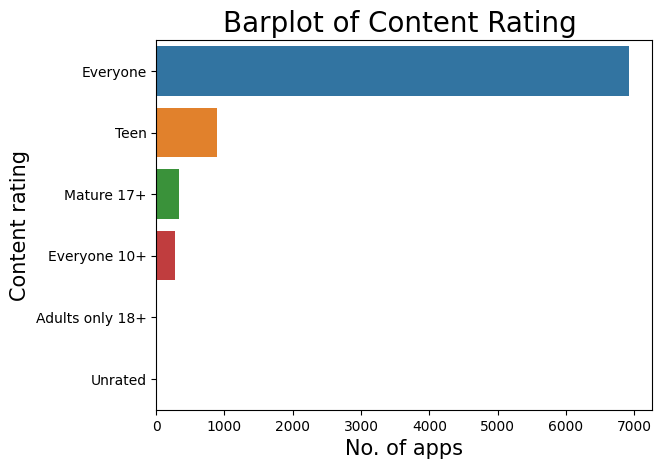

In [82]:
# barplot of content rating value counts
sns.barplot(x="Content Rating", y="index", data=value_c)
plt.title("Barplot of Content Rating ", fontsize=20)
plt.xlabel("No. of apps", fontsize= 15)
plt.ylabel("Content rating", fontsize= 15)

The Everyone category has the most apps, as can be seen from the plot above.

### <b><u>'Free' vs 'Paid' App Analysis</u>:</b>

In [ ]:
#plotting a graph between free and paid apps
plt.figure(figsize=(8,8))
labels = playstore_df['Type'].value_counts(sort = True).index
sizes = playstore_df['Type'].value_counts(sort = True)
colors = ["orange","blue"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percentage of Free Vs Paid Apps in store',size = 20)
plt.show()

We can see from the graph above that 92% of the apps in the Google Play store are free, while 8% are paid.

### <b><u>'Installs' wise Analysis</u>:</b>

Let us check, which category App’s have the most number of installs?

In [ ]:
# defining x
x = playstore_df.groupby('Category')['Installs'].agg(np.sum)

In [ ]:
# plotting line graph to determine category highest installations
plt.figure(figsize=(18,8))
plt.plot(x,  color='blue', marker='.')
plt.xticks(rotation=90)
plt.xlabel('Categories---->')
plt.ylabel('Installs---->')
plt.title('Category vs Installs')
plt.grid()
plt.show()

Graph clearly shows that apps in game category have been installed the highest followed by apps in family category and then apps in travel and local.

In [ ]:
# top 10 install app based on category
def top10incategory_installs(str):
    str = str.upper()
    top10 = playstore_df[playstore_df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);
    plt.xlabel('App', fontsize= 15)
    plt.ylabel('Installs',fontsize= 15)
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

After we are done with defining the function, it’s time to check and see if everything is working fine. So let’s test it by passing Game category to the above-defined function.

In [ ]:
#calling the function
top10incategory_installs('Game')

Subway Surfers has the most instals in the Game category, as shown in the graph above. In the same way, we can obtain the top 10 installed apps by passing various category names to the function.

### <b><u>'Price' wise Analysis</u>:</b>

Let us Visualize, which are the top 10 expensive Apps in the play store?

In [ ]:
# We will again need to create a separate data frame.
top10PaidApps_df = playstore_df[playstore_df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)

In [ ]:
#ploting the top 10 expensive App
plt.figure(figsize=(12,9));
plt.pie(top10PaidApps_df.Installs, explode=None, labels=top10PaidApps_df.App, autopct='%1.1f%%', startangle= -50);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10PaidApps_df.App, loc="top left", title="Apps", fontsize = "xx-small")

From the above graph, we can interpret that the App 'I am rich Premium' is the most expensive app in the google play store followed by 'I am Rich'.

In [ ]:
#Discription of feature Price
print('The mean price of an App in playstore is',playstore_df['Price'].mean())
print('The maximum price of an App in playstore is',playstore_df['Price'].max())
playstore_df['Price'].describe()

### <b><u>'Size' wise Analysis</u>:</b>

In [ ]:
# Plotting a line graph to determine size distribution
plt.figure(figsize=(10,5))
plt.xlabel("Size(in MB)")
plt.ylabel("Frequency")
plt.grid()
size_distribution_graph = sns.kdeplot(playstore_df['Size(in MB)'], color="lightgreen", shade = True)
plt.title('Average size',size = 20);

In [ ]:
print('The median size of an App in playstore is',playstore_df['Size(in MB)'].median())
print('The maximum size of an App in playstore is',playstore_df['Size(in MB)'].max())

In [ ]:
# Plotting a boxplot graph to determine size distribution
plt.figure(figsize=(10,5))
plt.xlabel("Size(in MB)")
plt.ylabel("No of apps")
plt.grid()
size_distribution_graph = sns.boxplot(playstore_df['Size(in MB)'], color="lightgreen")
plt.title('Average size',size = 20);

As we can see from the box plot above,

* 25% of apps are under 5 MB
* 25% of apps are between 30 Mb to 63 Mb
* Majority i.e. 50% lies between 5 Mb to 30 Mb.
* Many outliers are all the way upto 100 Mb
* Median is 12 Mb

### <b><u>'Reviews' wise Analysis</u>:</b>

Apps which are highly reviewed

In [ ]:
Apps_and_reviews= playstore_df.groupby('App')[['Reviews']].mean().sort_values('Reviews', ascending=False).head(10).reset_index()
sns.barplot(y = Apps_and_reviews['App'], x = Apps_and_reviews['Reviews'])
plt.title('Apps with highest ratings')
plt.show()

In [ ]:
print("Number of Apps with more than 1M reviews",playstore_df[playstore_df['Reviews'] > 1000000].shape[0])
print("\nTop 20 apps with most reviews: \n", playstore_df[playstore_df['Reviews'] > 1000000].sort_values(by='Reviews', ascending=False).head(20)['App'])

### <b><u>'Genres' wise Analysis</u>:</b>

In [ ]:
#top 10 Genres Value Counts
genres_count = playstore_df['Genres'].value_counts().reset_index()
genres_count.rename(columns={'index':'Genres','Genres':'count'}, inplace=True)
top_10_genres = genres_count.head(10)

In [ ]:
#Pie plot of Top 15 genres Count
plt.rcParams['figure.figsize'] = (20, 10)
plt.pie(top_10_genres['count'], labels=top_10_genres['Genres'], autopct='%.0f%%')
plt.title('Pie plot of Top 10 genres Count')
plt.grid()
plt.show()

Tools is the most used genre in apps.

## <b><u>Correlation Heatmap</u>:</b>

In [ ]:
#Correlation
playstore_df.corr()

In [ ]:
#Correlation Heatmap
plt.figure(figsize = (10,6))
sns.heatmap(playstore_df.corr(), annot=True)
plt.title("Correlation Heatmap", fontsize=20)

In [ ]:
#Regression Plot Of Installs And Reviews
plt.figure(figsize = (10,6))
sns.regplot(x="Installs", y="Reviews", data=playstore_df)
plt.title("Regression Plot of Installs And Reviews", fontsize=25)
plt.grid()

# <b><u>User Reviews Dataset</u>:</b>

In [ ]:
#First Look Of User Reviews Data
user_review_df.head()

In [ ]:
user_review_df.info()

### <b><u>Handling missing values</u>:</b>

In [ ]:
#data of Translated null values
user_review_df[user_review_df['Translated_Review'].isnull()].head()

In [ ]:
#Dropping Nulls of Translated Review as all other feature values are also null
user_review_df.dropna(subset=['Translated_Review'],inplace=True)

In [ ]:
#Checking data after removing nulls
user_review_df.info()

# <b><u>Combining 'Play Store Dataset' & 'User Review Dataset'</u>:</b>

In [ ]:
#unique apps is user_reviews_data
user_review_df['App'].nunique()

In [ ]:
#unique apps is play_store_data
playstore_df['App'].nunique()

In [ ]:
#Merging both data
combined_data = pd.merge(playstore_df, user_review_df, on='App')

In [ ]:
#Unique Apps in combined data
combined_data['App'].nunique()

In [ ]:
#About combined data
combined_data.isnull().sum()

# <b><u>Analysis Of Combined Data</u>:</b>

### <b><u>'Sentiment' wise Analysis</u>:</b>

In [ ]:
#Sentiment count
sentiment_count = combined_data.Sentiment.value_counts().reset_index().rename(columns={'index':'Sentiment','Sentiment':'count'})
sentiment_count

In [ ]:
#Pieplot of Sentiment Count
plt.rcParams['figure.figsize'] = (15, 7)
plt.pie(sentiment_count['count'], labels=sentiment_count['Sentiment'], autopct='%.0f%%', explode=(0,0.05,0.05))
plt.title('Pie plot of Sentiment Count', size=15)
plt.show()

This chart interprets that most of the reviews are positive.

In [ ]:
#Categoriwise Sentiment Count
categoriwise_sentiment_count = combined_data.groupby(['Category','Sentiment'])['Sentiment'].count().reset_index(name='count')
categoriwise_sentiment_count.head()

In [ ]:
#Barplot of categoriwise_sentiment_count
sns.barplot(x="Category", y="count", hue="Sentiment", data=categoriwise_sentiment_count)
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Category-wise sentiment count", fontsize=20)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Sentiments", fontsize=15)

This graph represents sentimnet analysis of the audience based on the categories, it can be observed that all the categories have more positive reviews than negatives.

# <b><u>Conclusion</u>:</b>

Joining the dots from given datasets, we came across a lot of information. After analysis and visualization, information can be classified into beneficial for customers and beneficial for developers. We discovered the top app categories, the most popular app categories, the proportion of free and paid apps, and the average app size. This information enables customers and users to make informed download decisions.

Game category has the highest engagement

• Thus, if fast growth is expected then introducing good quality game app of suitable size can work as a charm.

Opportunities

• Various apps category like Medical, food & drinks, Health & fitness and business & finances have positive sentimental advantage from users but the population of apps is less in those categories creating opportunities for new players